In [2]:
import pandas as pd

data = pd.read_csv('completed_data.csv')
data.head()

,Unnamed: 0,Start Date,End Date,Location,Urban Rural Code,FIPS State,FIPS County,FIPS Code,Indicator,Total deaths,...,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,Hispanic,Other,Urban Rural Description,2020,2021,2022,Income_per_Capita
0,0,01/01/2020,09/23/2023,"Anchorage Municipality, AK",3,2,20,2020,Distribution of all-cause deaths (%),9439,...,0.216,0.058,0.030,0.033,0.050,Medium metro,67764.0,72331.0,75506.0,71867.0
1,1,01/01/2020,09/23/2023,"Anchorage Municipality, AK",3,2,20,2020,Distribution of COVID-19 deaths (%),9439,...,0.255,0.111,0.074,0.038,0.033,Medium metro,67764.0,72331.0,75506.0,71867.0
2,2,01/01/2020,09/23/2023,"Anchorage Municipality, AK",3,2,20,2020,Distribution of population (%),9439,...,0.083,0.098,0.031,0.095,0.077,Medium metro,67764.0,72331.0,75506.0,71867.0
3,3,01/01/2020,09/23/2023,"Fairbanks North Star Borough, AK",4,2,90,2090,Distribution of all-cause deaths (%),2257,...,0.173,0.020,NaN,0.027,0.044,Small metro,60410.0,65243.0,67790.0,64481.0
4,4,01/01/2020,09/23/2023,"Fairbanks North Star Borough, AK",4,2,90,2090,Distribution of COVID-19 deaths (%),2257,...,0.257,NaN,NaN,NaN,0.056,Small metro,60410.0,65243.0,67790.0,64481.0


In [3]:
covid_deaths_data = data[data['Indicator'] == 'Distribution of COVID-19 deaths (%)']

covid_deaths_data.head()

,Unnamed: 0,Start Date,End Date,Location,Urban Rural Code,FIPS State,FIPS County,FIPS Code,Indicator,Total deaths,...,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,Hispanic,Other,Urban Rural Description,2020,2021,2022,Income_per_Capita
1,1,01/01/2020,09/23/2023,"Anchorage Municipality, AK",3,2,20,2020,Distribution of COVID-19 deaths (%),9439,...,0.255,0.111,0.074,0.038,0.033,Medium metro,67764.0,72331.0,75506.0,71867.000000
4,4,01/01/2020,09/23/2023,"Fairbanks North Star Borough, AK",4,2,90,2090,Distribution of COVID-19 deaths (%),2257,...,0.257,NaN,NaN,NaN,0.056,Small metro,60410.0,65243.0,67790.0,64481.000000
7,7,01/01/2020,09/23/2023,"Matanuska-Susitna Borough, AK",3,2,170,2170,Distribution of COVID-19 deaths (%),2797,...,0.083,NaN,NaN,0.046,NaN,Medium metro,52717.0,55049.0,58048.0,55271.333333
10,10,01/01/2020,09/23/2023,"Autauga, AL",3,1,1,1001,Distribution of COVID-19 deaths (%),1906,...,NaN,NaN,NaN,NaN,NaN,Medium metro,45151.0,48914.0,49391.0,47818.666667
13,13,01/01/2020,09/23/2023,"Baldwin, AL",4,1,3,1003,Distribution of COVID-19 deaths (%),9048,...,NaN,NaN,NaN,0.023,NaN,Small metro,51230.0,55865.0,56747.0,54614.000000


In [4]:
covid_deaths_data_filled = covid_deaths_data.fillna(0)

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming covid_deaths_data_filled is your DataFrame and it's already processed to fill NaNs
# You might need to adjust the feature names to match your dataset exactly

# Features and target variable
X = covid_deaths_data_filled[['Non-Hispanic White', 'Non-Hispanic Black', 'Non-Hispanic American Indian or Alaska Native', 'Non-Hispanic Asian', 'Non-Hispanic Native Hawaiian or Other Pacific Islander', 'Hispanic', 'Other', 'Urban Rural Description', 'Income_per_Capita']]
y = covid_deaths_data_filled['Total deaths']  # Adjust if your target variable is different

# Encoding categorical features and setting up the pipeline
categorical_features = ['Urban Rural Description']
numeric_features = X.columns.difference(categorical_features).tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])

rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the Random Forest model
rf_pipeline.fit(X_train, y_train)

# Feature names after one-hot encoding for categorical variables
ohe_feature_names = rf_pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
feature_names = list(numeric_features) + list(ohe_feature_names)

# Extracting feature importances
feature_importances = rf_pipeline.named_steps['regressor'].feature_importances_

# Displaying feature importances
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

importances_df

,Feature,Importance
8,Urban Rural Description_Large central metro,0.440751
3,Non-Hispanic Asian,0.218849
7,Other,0.076714
0,Hispanic,0.075934
4,Non-Hispanic Black,0.060991
1,Income_per_Capita,0.048936
6,Non-Hispanic White,0.046420
2,Non-Hispanic American Indian or Alaska Native,0.012223
5,Non-Hispanic Native Hawaiian or Other Pacific ...,0.006674
11,Urban Rural Description_Micropolitan,0.005567


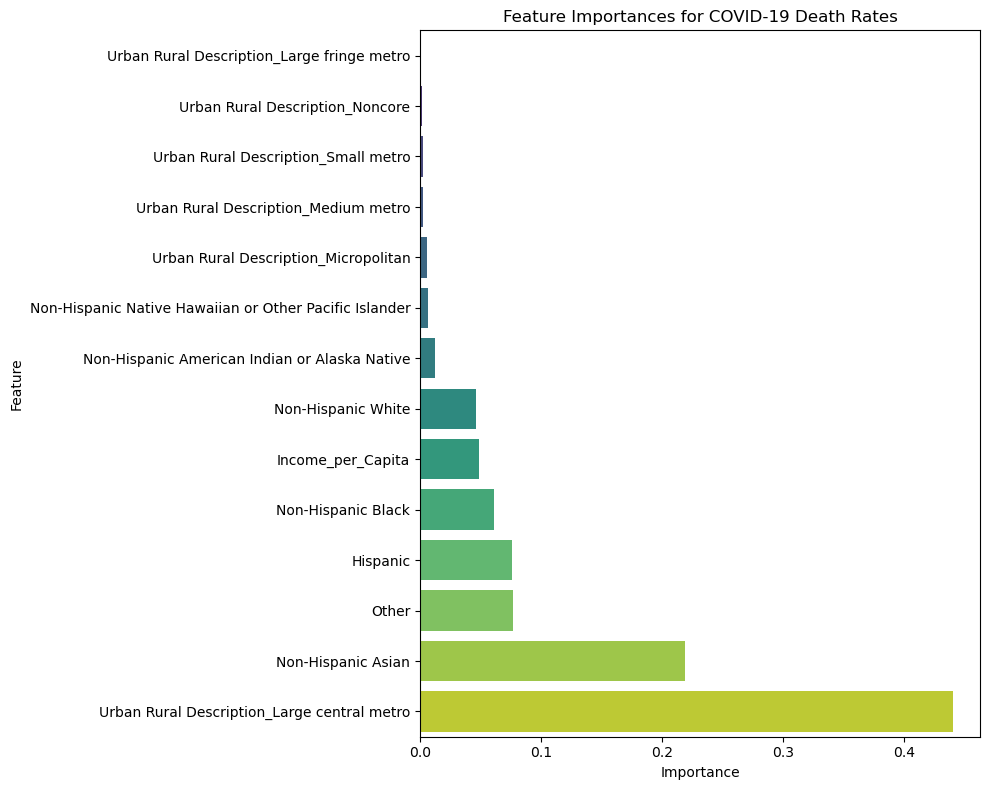

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

importances_df_sorted = importances_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df_sorted, palette='viridis')
plt.title('Feature Importances for COVID-19 Death Rates')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()

plt.show()